In [1]:
%matplotlib inline
import string
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image
import six.moves.cPickle as pickle
from operator import itemgetter, attrgetter
ITER_TAG = "Iteration"
TST_TAG = 'Testing'
MAP_TAG = "detection_eval"
MISS_TAG = "Missing"

In [2]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def draw(x, y, xlabel='Iterations', ylabel='', moving_average_window = 1, ylim=[], save=False, model="", sci=False):
    y_avg = movingaverage(y, moving_average_window)
    
    plt.rcParams['figure.figsize'] = (20.0, 16.0)
    if len(ylim)==2:
        plt.gca().set_ylim(ylim)
    else:
        plt.gca().set_ylim([min(y_avg), max(y_avg)])
    plt.gca().set_xlim([min(x), max(x)])
    plt.plot(x,y_avg)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    if sci:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    if save:
        plt.savefig("plot/"+model+"-"+ylabel+".pdf")
    plt.show()

In [3]:
#Log = '../jobs/VGGNet/okutama/flow/SSD_512x512/VGG_okutama_flow_SSD_512x512.log' # set log path
Log = '../jobs/VGGNet/okutama/SSD_512x512/log-final.log' # set log path
def find_loss(splt):
    splt = line.split(' ')
    ind = splt.index("=") + 1
    return float(splt[ind])

loss = []
error = []
it = 0
with open(Log,"r") as infile:
    for line in infile:
        splt = line.split(' ')
        if TST_TAG in splt:
            ind = splt.index(TST_TAG)
            itr_string = splt[ind-1]
            if itr_string[-1] != ",":
                print "Something is Wrong"
                print line
                break
            itr = int(itr_string[:-1])
            line = next(infile)
            if not (MAP_TAG in line.split(' ')):
                line = next(infile)
                while MISS_TAG in line.split(' '):
                    line = next(infile)
                if not (MAP_TAG in line.split(' ')):
                    print "Cannot find MAP"
                    print line
                    break
            error.append((itr, find_loss(line)))
        elif ITER_TAG in splt and "loss" in splt and (not "lr" in splt):
            ind = splt.index(ITER_TAG)
            itr_string = splt[ind+1]
            if itr_string[-1] != ",":
                print "Something is Wrong"
                print line
                break
            itr = int(itr_string[:-1])
            loss.append( (itr, find_loss(line) ) )

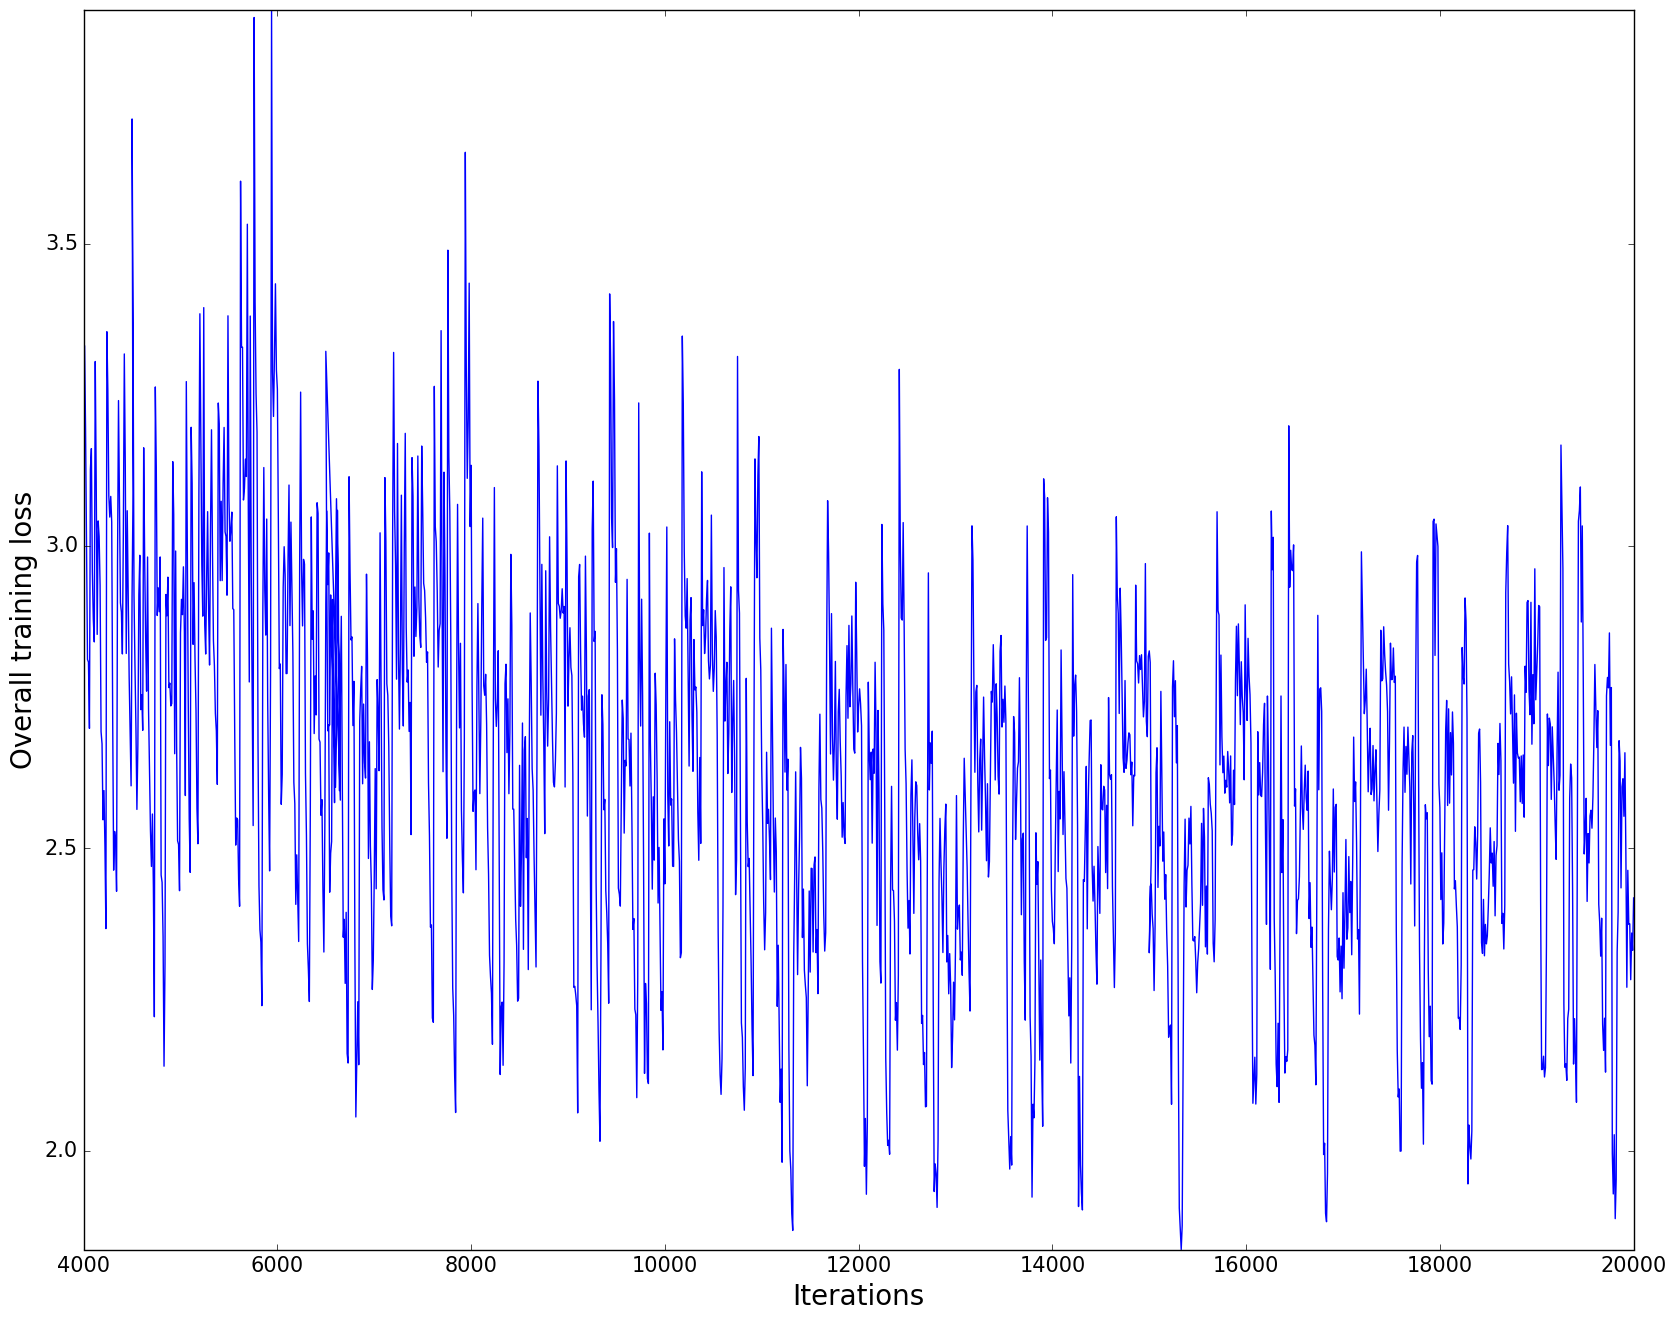

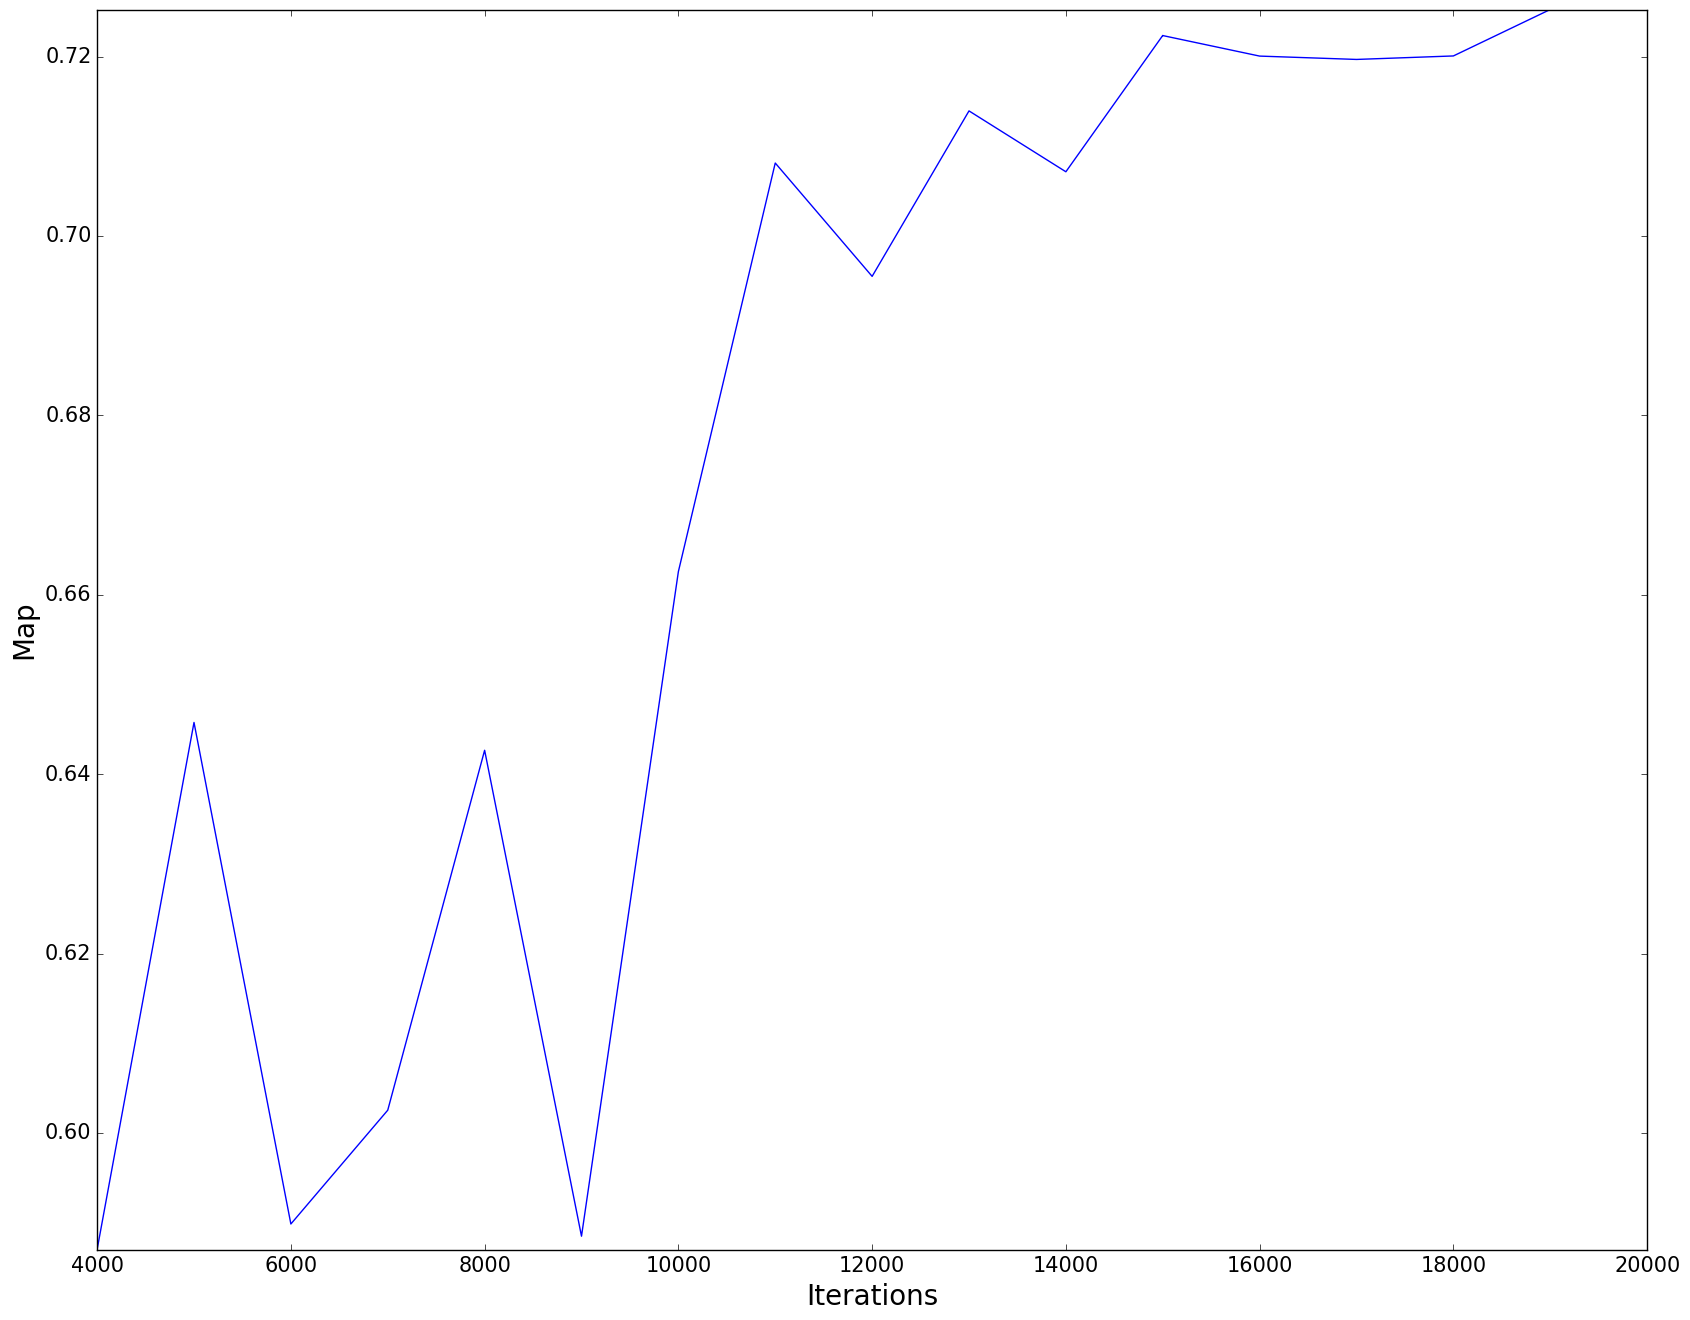

In [4]:
draw(*zip(*loss), ylabel="Overall training loss", save=False,  model="VGG_512x512")
draw(*zip(*error), ylabel="Map", save=False,  model="VGG_512x512")

In [6]:
for e in error:
    print e

(4000, 0.58701)
(5000, 0.645768)
(6000, 0.589855)
(7000, 0.602541)
(8000, 0.642666)
(9000, 0.588493)
(10000, 0.662582)
(11000, 0.708135)
(12000, 0.695499)
(13000, 0.713945)
(14000, 0.70716)
(15000, 0.722357)
(15000, 0.722344)
(16000, 0.720056)
(17000, 0.719683)
(18000, 0.720072)
(19000, 0.72525)
(20000, 0.725159)
